In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

### Exploratory data analysis

In [1]:
data = pd.read_csv('Epileptic Seizure Recognition.csv')
print(data.shape)

data.head()

NameError: name 'pd' is not defined

In [ ]:
data = data.drop('Unnamed: 0', axis=1)
print(data.shape)

(11500, 179)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [ ]:
# check missing data
data.isnull().sum().sum()

0

Feature correlation


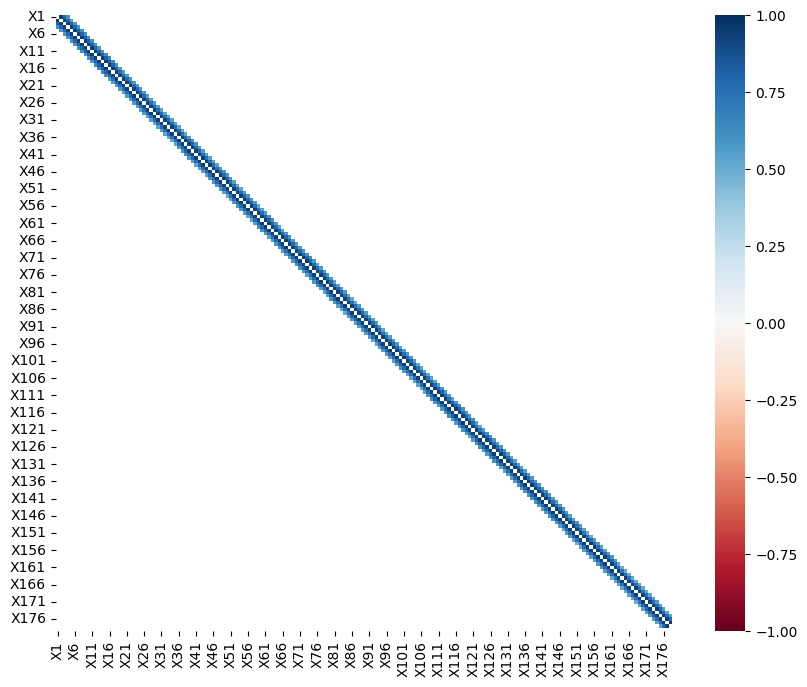

In [ ]:
#Pearson Correlation
plt.figure(figsize=(10, 8))
cor = data.corr()
filtered_cor = cor[((cor>=.5) | (cor<=-.5)) & (cor!=1.000)]
sns.heatmap(filtered_cor, annot=False, vmin=-1, vmax=1, cmap=plt.cm.RdBu)
plt.show()

#### Visualization

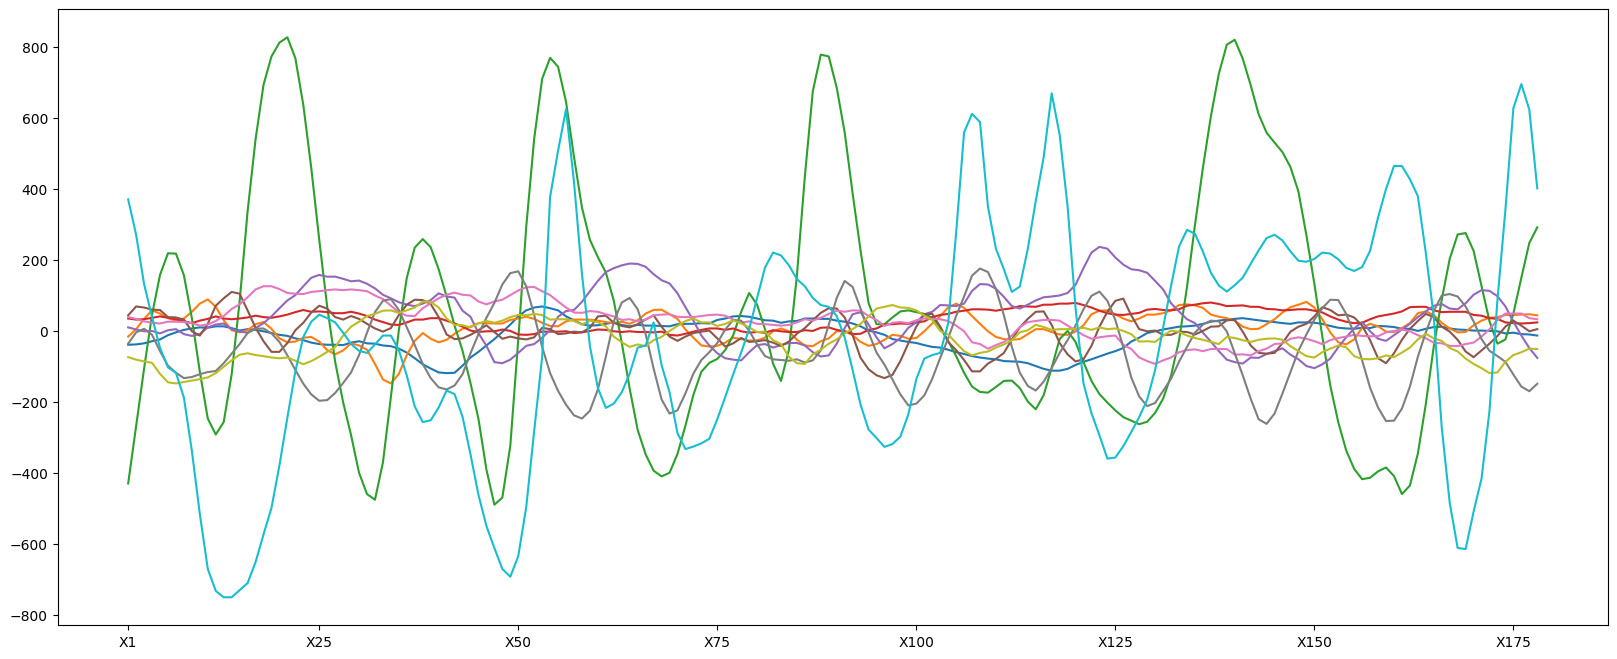

In [ ]:
# plot some multichannel EEG signals
fig, ax = plt.subplots(figsize=(20,8))
sig_idx = np.random.randint(data.shape[0], size=10)
for i in sig_idx:
    ax.plot(data.iloc[i, 0:-1])
    ax.set_xticks([0, 24, 49, 74, 99, 124, 149, 174])

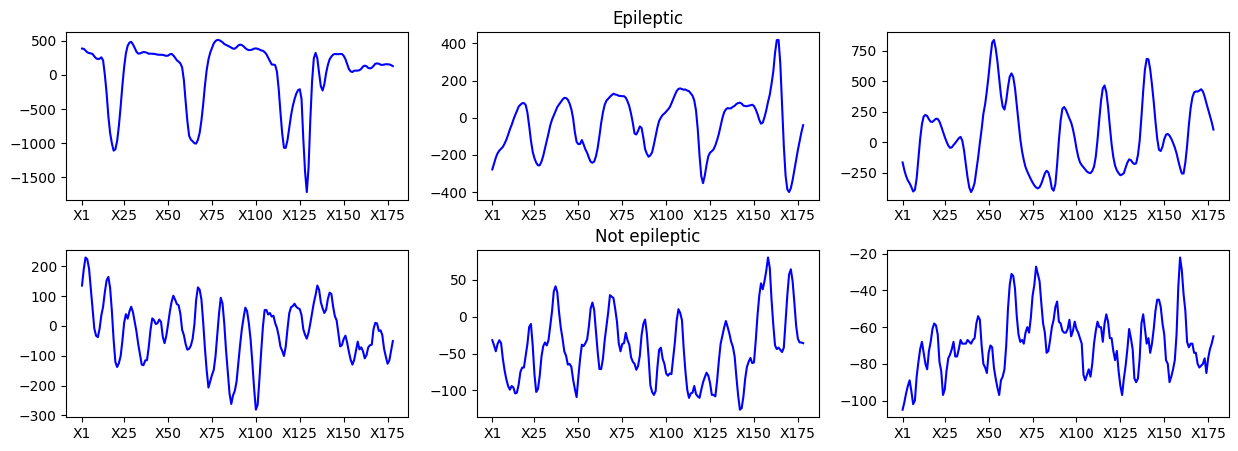

In [ ]:
# plot some epileptic and no epileptic cases
fig, ax = plt.subplots(2, 3, figsize=(15, 5), gridspec_kw={'hspace': 0.3})
for i in range(3):
    ax[0, i].plot((data[data['y']==1]).iloc[i, 0:-1], color='b')
    ax[0, i].set_xticks([0, 24, 49, 74, 99, 124, 149, 174])
ax[0, 1].set_title('Epileptic')
for i in range(3):
    ax[1, i].plot((data[data['y']!=1]).iloc[i, 0:-1], color='b')
    ax[1, i].set_xticks([0, 24, 49, 74, 99, 124, 149, 174])
ax[1, 1].set_title('Not epileptic')
plt.show()

In [ ]:
# examine the similarity of EEG signals from different channels
fig = go.Figure()
fig.add_trace(go.Scatter(y=data["X1"], name="X1",
                             line=dict(color="firebrick", width=1)))
fig.add_trace(go.Scatter(y=data["X100"], name="X100",
                             line=dict(color="blue", width=1)))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title={'text': "EEG signals from different channels",})
fig.show()

#### Class distribution

In [ ]:
# check class distribution
data['y'].value_counts()

,count
y,
4,2300
1,2300
5,2300
2,2300
3,2300


In [ ]:
# change the labels to binary labels (seizure y=1, non-seizure y=0)
data['y'][data['y']>1] = 0

In [ ]:
data['y'].value_counts()

,count
y,
0,9200
1,2300


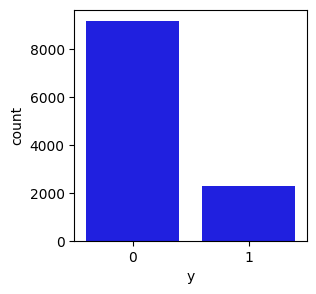

In [ ]:
# plot class distribution
fig, ax = plt.subplots(figsize=(3,3))
sns.countplot(data=data, x='y', ax=ax, color='b')
plt.show()

In [ ]:
# statistics of epileptic data
data[data['y'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


In [ ]:
# description of non-epileptic data
data[data['y'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0
